In [113]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

(480, 480)


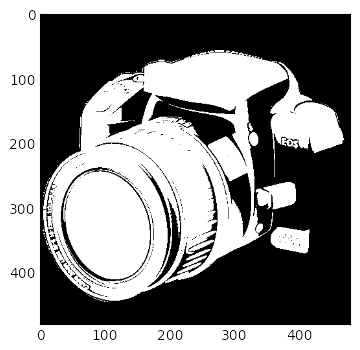

In [156]:
filename = '/Users/munsellb/camera.png'
I = cv2.imread( filename )
G = I[:,:,1] #cv2.cvtColor( I, cv2.COLOR_BGR2GRAY )
X = np.zeros( G.shape )
X = cv2.GaussianBlur(G, (5,5), 0.5 )
B = cv2.Laplacian( X, cv2.CV_64F )
#B = cv2.Sobel( X, cv2.CV_64F, 1, 1, ksize=3 )

[ret, B] = cv2.threshold( X, 25, 255, cv2.THRESH_BINARY )

print B.shape

plt.imshow( B, cmap='gray')

(800, 666)
[523 522 514 513 509 508 506 505 504 503 501 500 499 497 496 495 494 493
 492 481 481 478 478 477 477 475 475 474 474 473 473 472 472 471 471 470
 470 469 469 470 470 471 471 472 472 473 473 474 474 475 475 476 476 478
 478 479 479 488 489 492 493 494 495 497 499 501 503 504 506 507 512 513
 525 526 532 533 534 535 538 539 540 541 543 545 547 550 551 554 555 561
 561 563 563 566 566 567 567 569 569 570 570 571 571 572 572 573 573 574
 574 573 573 572 572 571 571 570 570 568 568 567 567 564 564 555 554 552
 551 549 548 546 544 543 542 541 537 536 535 534 532 531 530 529]


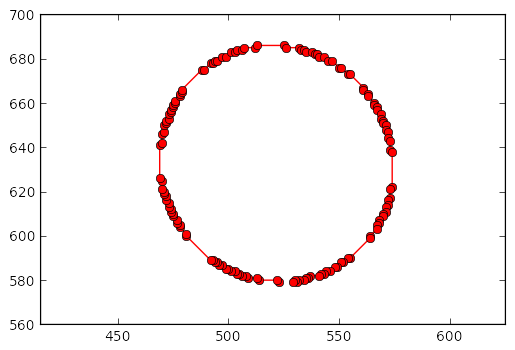

(800, 666)


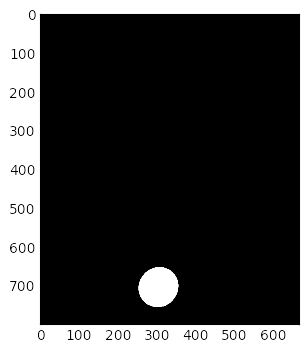

In [176]:
filename = '/Users/munsellb/coins.jpeg'
I = cv2.imread( filename )
G = cv2.cvtColor( I, cv2.COLOR_BGR2GRAY )

print G.shape

S = np.zeros( G.shape )
B = cv2.GaussianBlur( G,(5,5),0.5)
[ret, thresh] = cv2.threshold( B, 50, 255, cv2.THRESH_BINARY )

#plt.imshow( thresh )

contours,h = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE )

L=contours[1][:,0]
print L[:,0]
plt.plot( L[:,0], L[:,1], 'ro-')
plt.axis( 'equal' )
plt.show();

cv2.drawContours(S, contours, 0, 255, -1 )

print S.shape

plt.imshow( S, cmap='gray')


### Gradient assignment

The Laplacian $\nabla f = \frac{\partial f}{\partial x} + \frac{\partial f}{\partial y }$ performs a partial first-order derivative in both the x-direction $\frac{\partial f}{\partial x}$ and the y-direction $\frac{\partial f}{\partial y}$ where $f(x,y)$ is a function that represents the image we are operating on. In discrete notation the partial first-order derivates are found using:

$$G_x = \frac{\partial f}{\partial x} = f(x+1,y) - f(x-1,y)$$

and

$$G_y = \frac{\partial f}{\partial y } = f(x,y+1) - f(x,y-1)$$

We can then find the magnitude of the gradient

$$| \nabla f(x,y) | = \sqrt{ G_x^2 + G_y^2 }$$

and the angle of the gradient

$$ \Theta = tan^{-1} \frac{G_y}{G_x} $$.

The $3 \times 1$ kernel matrix for $G_x$ is

<table width="5%">
    <tr>
      <td><center>-1</center></td>
    </tr>
    <tr>
      <td><center>0</center></td>
    </tr>
    <tr>
      <td><center>1</center></td>
    </tr>
</table>

and the $1 \times 3$ kernel matrix for $G_y$ is

<table width="15%">
    <tr>
      <td><center>-1</center></td>
      <td><center>0</center></td>
      <td><center>1</center></td>
    </tr>
</table>

**Q1**. [*All Students*] Using Python and the OpenCV library, write a small program that applies the gradient kernel matrices (defined above) to the "ghand.png" image. Your program shall create a new *gradient magnitude* image that only defines the contour of the hand. All other edge information should not be included. Note: you may use thresholding and smoothing operations provided by the OpenCV library (i.e. you don't need to write your own program to perform this operation) to help solve this question. 

**Q2**. [*All Students*] Using Python and the OpenCV library, write a small program that applies the gradient kernel matrices (defined above) to the "ghand.png" image. Your program shall create a new *gradient angle* image that only defines the contour of the hand. All other edge information should not be included. Note: you may use the gradient magnitude image found in Q1 above to help solve this question. 

(816, 612, 3)


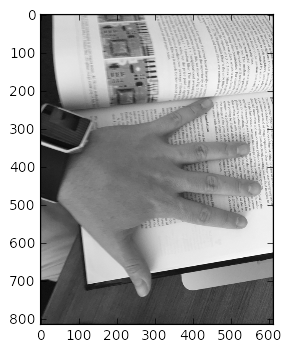

In [196]:
filename = '/Users/munsellb/ghand.png'
I = cv2.imread( filename )

print I.shape

plt.imshow( I )

### Laplacian assignment

The Laplacian $\nabla^2 f = \frac{\partial^2f}{\partial x^2} + \frac{\partial^2f}{\partial y^2}$ performs a partial second-order derivative in both the x-direction $\frac{\partial^2f}{\partial x^2}$ and the y-direction $\frac{\partial^2f}{\partial y^2}$ where $f(x,y)$ is a function that represents the image we are operating on. In discrete notation the partial second-order derivates are found using:

$$\frac{\partial^2f}{\partial x^2} = f(x+1,y) + f(x-1,y) - 2f(x,y)$$
and
$$\frac{\partial^2f}{\partial y^2} = f(x,y+1) + f(x,y-1) - 2f(x,y)$$

In general, we combine these two second order derivatives

$$\nabla^2 f(x,y) = f(x+1,y) + f(x-1,y) + f(x,y+1) + f(x,y-1) - 4f(x,y)$$

into one $3 \times 3$ kernel matrix

<table width="25%">
    <tr>
      <td><center>0</center></td>
      <td><center>1</center></td>
      <td><center>0</center></td>
    </tr>
    <tr>
      <td><center>1</center></td>
      <td><center>-4</center></td>
      <td><center>1</center></td>
    </tr>
    <tr>
      <td><center>0</center></td>
      <td><center>1</center></td>
      <td><center>0</center></td>
    </tr>
</table>

**Q1**. [*MUSC Graduate Students*] Why do we combine the two partial second-order derivatives into one $3 \times 3$ Laplacian kernel matrix? That is, why don't we perform a x-direction ( $3 \times 3$ kernel matrix) and y-direction ($3 \times 3$ kernel matrix) computation, i.e. like gradient above, to find the magnitude and direction of the edge?

**Q2**. [*All Students*] Using Python and the OpenCV library, write a small program that applies the Laplacian kernel matrix (defined above) to the "hand.png" image. Your program shall create a new edge image that only defines the contour of the hand. All other edge information should not be included. Note: you may use color information and smoothing kernels provided by the OpenCV library (i.e. you don't need to write your own program to perform this operation) to help solve this question. 
